## 2. Exploratory data analysis

1. Exploration of variables individually
2. Assessment of the relationship between each variable and the target variable
3. Assessment of the interaction between variables
4. Exploration of data across many dimensions

_Note: The first part of this section has been already been performed in notebook "1A_JNT_collection_and_inspection"_

Importing the required packages and dataset:

In [12]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOLTYPE':'category',
            'EQUIPAGE':'category',
            'EQUIPM':'category',
            'FUELHEAT':'category',
            'IECC_CLIMATE_PUB':'category',
            'KOWNRENT':'category',
            'MONEYPY':'category',
            'ROOFTYPE':'category',
            'TYPEHUQ':'category',
            'STORIES':'category',
            'WALLTYPE':'category',
            'YEARMADERANGE':'category',
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [14]:
df.shape

(5686, 42)

In [15]:
# Print sample

df.head()

,ATTIC,ATTICFIN,BASEFIN,BEDROOMS,CDD30YR,CDD65,CELLAR,COOLTYPE,DOLELCOL,DOLLAREL,...,WALLTYPE,YEARMADERANGE,DOLELLGT,TOTALDOLWTH,TOTALDOLWTH_log,DOLELLGT_log,TOTSQFT_EN_log,TOTALDOLSPH_log,DOLLAREL_log,DOLELCOL_log
0,0.0,0.0,0.0,3,1332.0,1768.0,0.0,Central AC,365.46,967.23,...,Stucco,2000-2009,75.18,248.33,5.514759,4.319885,7.499977,5.173831,6.874436,5.901157
1,0.0,0.0,0.0,2,2494.0,2795.0,0.0,Individual units,249.54,1366.00,...,Siding,1980-1989,124.51,234.49,5.457413,4.824386,6.632002,5.941539,7.219642,5.519619
2,0.0,0.0,1.0,4,2059.0,2235.0,1.0,Both central and individual,844.63,2428.08,...,Wood,1970-1979,113.33,250.71,5.524297,4.730304,7.735433,6.398878,7.794856,6.738899
3,0.0,0.0,1.0,3,1327.0,1374.0,1.0,Central AC,471.13,1313.12,...,Siding,1950-1959,64.58,114.62,4.741622,4.167905,7.852828,6.760948,7.180161,6.155134
4,1.0,0.0,0.0,3,871.0,993.0,1.0,Central AC,62.05,581.07,...,Brick,1970-1979,112.65,220.26,5.394809,4.724286,6.931472,4.217594,6.364871,4.127941


---

**Assessment of the relationship between each variable and the target variable**

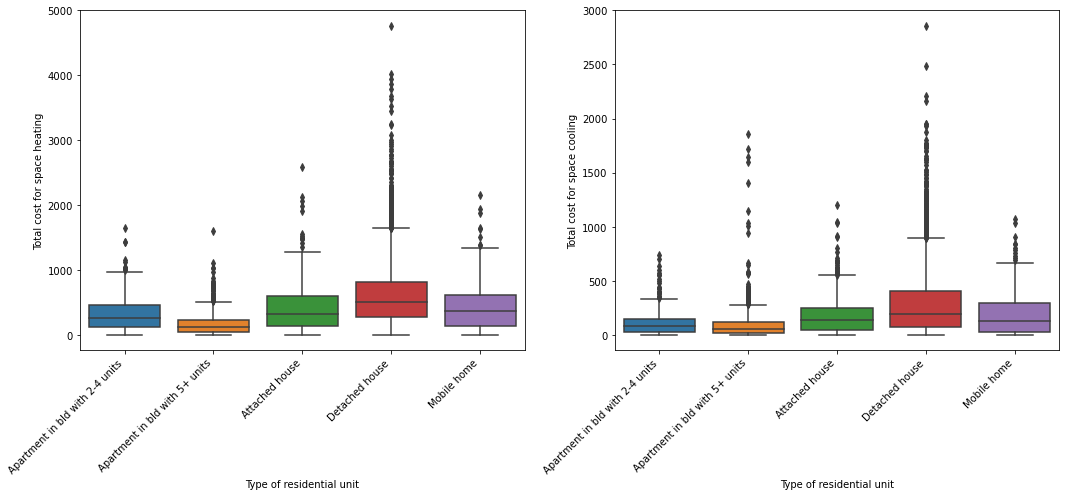

In [37]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='TYPEHUQ', y='TOTALDOLSPH', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Type of residential unit')
plt.ylabel('Total cost for space heating')
#plt.ylim(-10, 2000)
#plt.yscale('log')


plt.subplot(1,2,2)
sns.boxplot(x='TYPEHUQ', y='DOLELCOL', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total cost for space cooling')
plt.xlabel('Type of residential unit')

plt.tight_layout()
plt.show()

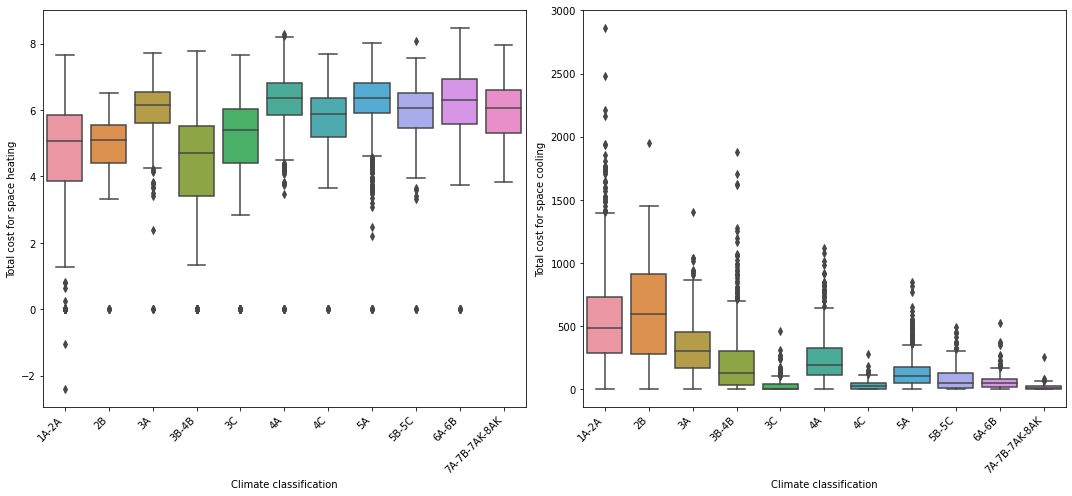

In [36]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='IECC_CLIMATE_PUB', y='TOTALDOLSPH_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Climate classification')
plt.ylabel('Total cost for space heating')
#plt.ylim(-10, 2000)
#plt.yscale('log')


plt.subplot(1,2,2)
sns.boxplot(x='IECC_CLIMATE_PUB', y='DOLELCOL', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total cost for space cooling')
plt.xlabel('Climate classification')

plt.tight_layout()
plt.show()

In [ ]:
# Set visual style for graphs

plt.style.use('seaborn')

In this section, two variables containing cooling degree days (CDD) in 2015 and a 30 years CDD average are collated to analyze how far 2015 deviates from the average, and later adjust the response variable result accordingly. Cumulative distribution functions for both variables are plotted for comparison below.

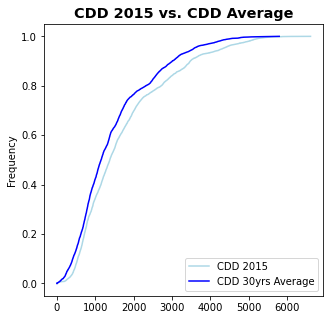

In [7]:
# Creates the figure
fig = plt.figure(figsize=(5,5), dpi=72)

# Creates CDF values
cdf1 = 1. * np.arange(len(df['CDD65'])) / (len(df['CDD65']) - 1)
cdf2 = 1. * np.arange(len(df['CDD30YR'])) / (len(df['CDD30YR']) - 1)

# Plots function
plt.plot(df['CDD65'].sort_values(), cdf1, color='lightblue')
plt.plot(df['CDD30YR'].sort_values(), cdf2, color='blue')
    
# Adjusts appearance
plt.ylabel('Frequency')
plt.title('CDD 2015 vs. CDD Average', fontsize='x-large', fontweight='bold')
plt.legend(['CDD 2015', 'CDD 30yrs Average'])

plt.show()

In [8]:
# Calculates cooling degree days mean difference in % 

prct_diff_CDD = round(((df['CDD30YR'].mean()-df['CDD65'].mean())*100 / df['CDD30YR'].mean()), 2)

prct_diff_CDD

-18.51

Same process for Heating Degree Days (HDD)

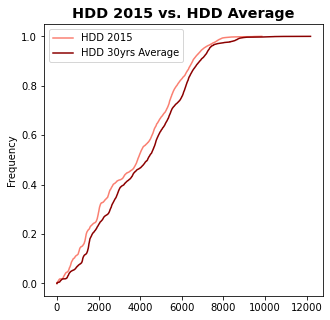

In [9]:
# Creates the figure
fig = plt.figure(figsize=(5,5), dpi=72)

# Creates CDF values
cdf3 = 1. * np.arange(len(df['HDD65'])) / (len(df['HDD65']) - 1)
cdf4 = 1. * np.arange(len(df['HDD30YR'])) / (len(df['HDD30YR']) - 1)

# Plots function
plt.plot(df['HDD65'].sort_values(), cdf3, color='salmon')
plt.plot(df['HDD30YR'].sort_values(), cdf4, color='darkred')
    
# Adjusts appearance
plt.ylabel('Frequency')
plt.title('HDD 2015 vs. HDD Average', fontsize='x-large', fontweight='bold')
plt.legend(['HDD 2015', 'HDD 30yrs Average'])

plt.show()

In [10]:
# Calculates heating degree days mean difference in % 

prct_diff_HDD = round(((df['HDD30YR'].mean()-df['HDD65'].mean())*100 / df['HDD30YR'].mean()), 2)

prct_diff_HDD

9.27

---

In [11]:
fit_line_lin = np.polyfit(df.CDD65, df.DOLELCOL, 1)
fit_line_quad = np.polyfit(df.CDD65, df.DOLELCOL, 2)

In [1]:
df_byCDD65 = df.sort_values(by='CDD65')

df_byCDD65.plot.scatter(x='CDD65', y='DOLELCOL', alpha=0.3, s=5, figsize=(10,10), marker='o')
plt.ylim((0,2000))
plt.xlim((0,6000))

plt.plot(df_byCDD65.CDD65, fit_line_lin[0] * df_byCDD65.CDD65 + fit_line_lin[1], color='red', linewidth=1)
plt.plot(df_byCDD65.CDD65, fit_line_quad[0] * df_byCDD65.CDD65**2 + fit_line_quad[1] * df_byCDD65.CDD65 + fit_line_quad[2], color='green', linewidth=1)
#plt.plot(assesed_as.FLOORAREA, fit_line_cub[0] * assesed_as.FLOORAREA**3 + fit_line_cub[1] * assesed_as.FLOORAREA**2 + fit_line_cub[2] * assesed_as.FLOORAREA + fit_line_cub[3], color='red', linewidth=2)
plt.show()

NameError: name 'df' is not defined